<a href="https://colab.research.google.com/github/BriceMboumba/BriceMboumba/blob/master/Mouvement_Pilotage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Partie I : nettoyage des données*

In [ ]:
#Importation des library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import math

In [ ]:
#Chargement du dataset
from google.colab import files
upload = files.upload()


Saving MOUVEMENT_PILOTAGE_MAGASIN.csv to MOUVEMENT_PILOTAGE_MAGASIN.csv


In [ ]:
#Lecture du dataset avec pandas
dataset = pd.read_csv('MOUVEMENT_PILOTAGE_MAGASIN.csv', sep = ';')

#Affichage des 10 premiers éléments du tableau pour avoir un apperçu
dataset.head(10)

,Unité,Magasin,Code matériel,Libellé,Type de mouvement,Quantité mouvementée,Date du mouvement,Prénom et nom,Raison sociale,BNU
0,BEL,OUT ZC TR2,"LOECL6,5LP",LAMPE PORTO A LEDS,Emprunt Client,1,29/11/2019,LUIS MANUEL MOREIRA ALVES 180526,ORANO DS DEMANTELEMENT ET SERVICES,180526.0
1,BEL,OUT ZC TR2,CSCD4D40-200-BEL037,CLE DYNAMOMETRIQUE DE 40 A 200 NM,Emprunt Client,1,29/11/2019,LUIS MANUEL MOREIRA ALVES 180526,ORANO DS DEMANTELEMENT ET SERVICES,180526.0
2,BEL,OUT ZC TR2,CDD12CSN24,DOUILLE 1/2 COURTE SA 24 BOS 691160,Emprunt Client,1,29/11/2019,LUIS MANUEL MOREIRA ALVES 180526,ORANO DS DEMANTELEMENT ET SERVICES,180526.0
3,BEL,OUT ZC TR2,CLMACHEXC6,CLE MALE COURTE HEXAGONALE COUDEE DE 6\n,Emprunt Client,1,29/11/2019,DOMINIQUE MENGOZZI 248182,KSB SERVICE ENERGIE,248182.0
4,BEL,OUT ZC TR2,ISMULMCVERR,PINCE MULTIPRISE DENTURE TOTALE,Emprunt Client,1,29/11/2019,DOMINIQUE MENGOZZI 248182,KSB SERVICE ENERGIE,248182.0
5,BEL,OUT ZC TR2,PICOUDIAST,PINCE COUPANTE DIAGONALE,Emprunt Client,1,29/11/2019,DOMINIQUE MENGOZZI 248182,KSB SERVICE ENERGIE,248182.0
6,BEL,OUT ZC TR2,CLMOM20,CLE A MOLETTE 6,Emprunt Client,1,29/11/2019,DOMINIQUE MENGOZZI 248182,KSB SERVICE ENERGIE,248182.0
7,BEL,OUT ZC TR2,UBMDE828000-BEL003,MEULEUSE DROITE ELECTRIQUE 8 MM 28000 TOURS,Emprunt Client,1,29/11/2019,JULIEN UBEDA 635928,MONTEIRO,635928.0
8,BEL,OUT ZC TR2,MHPAGMANTSTD-BEL036,POMPE A GRAISSE TRANSLUCIDE,Emprunt Client,1,29/11/2019,ALEXANDRE ROCHA 255593,SPIE NUCLEAIRE,255593.0
9,BEL,OUT ZC TR2,MECD4D5-25-BEL008,CLE DYNAMO A DECLENCHEMENT PRECISION 4% DE 5 A...,Emprunt Client,1,29/11/2019,THIBAUT JOURDAIN 415440,KSB SERVICE ENERGIE,415440.0


In [ ]:
#Suppression des variables non significatives
dataset = dataset.drop(['Unité', 'Magasin', 'Code matériel', 'Prénom et nom' , 'BNU'], axis = 1)

#Affichage des 10 premiers éléments du tableau sans les variables non significatives
dataset.head(10)

,Libellé,Type de mouvement,Quantité mouvementée,Date du mouvement,Raison sociale
0,LAMPE PORTO A LEDS,Emprunt Client,1,29/11/2019,ORANO DS DEMANTELEMENT ET SERVICES
1,CLE DYNAMOMETRIQUE DE 40 A 200 NM,Emprunt Client,1,29/11/2019,ORANO DS DEMANTELEMENT ET SERVICES
2,DOUILLE 1/2 COURTE SA 24 BOS 691160,Emprunt Client,1,29/11/2019,ORANO DS DEMANTELEMENT ET SERVICES
3,CLE MALE COURTE HEXAGONALE COUDEE DE 6\n,Emprunt Client,1,29/11/2019,KSB SERVICE ENERGIE
4,PINCE MULTIPRISE DENTURE TOTALE,Emprunt Client,1,29/11/2019,KSB SERVICE ENERGIE
5,PINCE COUPANTE DIAGONALE,Emprunt Client,1,29/11/2019,KSB SERVICE ENERGIE
6,CLE A MOLETTE 6,Emprunt Client,1,29/11/2019,KSB SERVICE ENERGIE
7,MEULEUSE DROITE ELECTRIQUE 8 MM 28000 TOURS,Emprunt Client,1,29/11/2019,MONTEIRO
8,POMPE A GRAISSE TRANSLUCIDE,Emprunt Client,1,29/11/2019,SPIE NUCLEAIRE
9,CLE DYNAMO A DECLENCHEMENT PRECISION 4% DE 5 A...,Emprunt Client,1,29/11/2019,KSB SERVICE ENERGIE


In [ ]:
#On vérifie s'il n'y a pas de valeurs manquantes dans notre dataset
dataset.isnull().any()

Libellé                 False
Type de mouvement       False
Quantité mouvementée    False
Date du mouvement       False
Raison sociale           True
dtype: bool

In [ ]:
#On remplace toutes les données valeurs manquantes par 'Unknown' vu qu'elles sont de type catégorielle et appartiennent à la colonne : Raison sociale
dataset = dataset.fillna('Unknown')

#On vérifie de nouveau s'il n'y a pas de valeurs manquantes dans notre dataset, en l'occurrence dans la colonne : Rainson sociale 
dataset.isnull().any()

Libellé                 False
Type de mouvement       False
Quantité mouvementée    False
Date du mouvement       False
Raison sociale          False
dtype: bool

In [ ]:
#Affichage du type de dataset
print(type(dataset))

#Affichage du descriptif des données numériques du dataset
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
       Quantité mouvementée
count          17349.000000
mean               1.077757
std                0.325330
min                1.000000
25%                1.000000
50%                1.000000
75%                1.000000
max               10.000000


In [ ]:
#Affichage des informations sur le dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17349 entries, 0 to 17348
Data columns (total 5 columns):
Libellé                 17349 non-null object
Type de mouvement       17349 non-null object
Quantité mouvementée    17349 non-null int64
Date du mouvement       17349 non-null object
Raison sociale          17349 non-null object
dtypes: int64(1), object(4)
memory usage: 677.8+ KB


In [ ]:
#Affichage des données de la colonne des Quantités mouvementées
print(dataset[['Quantité mouvementée']])

#Vérification des nombres d'outils répétitfs
print(pd.unique(dataset['Quantité mouvementée']).tolist())

#Vérification du maximum d'outils que l'on peut sortir par jour
print(dataset[['Quantité mouvementée']].max())

#Création du DataFram des temps de recherche d'outils sur logiciel
Time = pd.DataFrame(
    {
      'time' : [i for i in range(len(dataset))]
    }
)
#Affichage du DataFram créé
Time

       Quantité mouvementée
0                         1
1                         1
2                         1
3                         1
4                         1
...                     ...
17344                     1
17345                     1
17346                     1
17347                     1
17348                     1

[17349 rows x 1 columns]
[1, 2, 3, 4, 6, 5, 10]
Quantité mouvementée    10
dtype: int64


,time
0,0
1,1
2,2
3,3
4,4
...,...
17344,17344
17345,17345
17346,17346
17347,17347


In [ ]:
#Ajout de l'information suplémentaire sur les durées de recherche d'outils sur le logiciel
#Remplissage du DataFram des temps de recherche en fonction du nombre d'outils
nb = []
for i in range(len(dataset)):
  nb.append(dataset.loc[i, 'Quantité mouvementée']) #Récupération de la valeur de la i nième ligne de la colonne 'Quantité mouvementée'
  if(nb[i] == 0):
    Time.iloc[i, 0] = 10 #min                        
  elif(nb[i] == 1):                                  
    Time.iloc[i, 0] = 10 #min
  elif(nb[i] == 2):
    Time.iloc[i, 0] = 15 #min
  elif(nb[i] == 3):
    Time.iloc[i, 0] = 20 #min                                   Il faut noter que le 0 dans Time.iloc[i, 0] désigne la colonne du DataFram (Time) 
  elif(nb[i] == 4):                                       #auquel on ajoute la valeur trouvée : ici 0 pour la première colonne car Time n'a qu'une dimension
    Time.iloc[i, 0] = 25 #min
  elif(nb[i] == 5):
    Time.iloc[i, 0] = 30 #min
  elif(nb[i] == 6):
    Time.iloc[i, 0] = 35 #min
  elif(nb[i] == 10):
    Time.iloc[i, 0] = 40 #min
    
 

In [ ]:
#On vérifie
Time.head(10)

,time
0,10
1,10
2,10
3,10
4,10
5,10
6,10
7,10
8,10
9,10


In [ ]:
New_dataset = pd.concat([dataset, Time], axis = 1) # 'concat' de pandas n'est sûrement pas le meilleure moyen de joindre deux tableaux numpy
                                                   # car plus on compile/exécute le code plus il concatène le DataFram, et donc génère des doublants 


In [ ]:
#Affichage du nouveau dataset avec le temps (Time)
New_dataset 

,Libellé,Type de mouvement,Quantité mouvementée,Date du mouvement,Raison sociale,time
0,LAMPE PORTO A LEDS,Emprunt Client,1,29/11/2019,ORANO DS DEMANTELEMENT ET SERVICES,10
1,CLE DYNAMOMETRIQUE DE 40 A 200 NM,Emprunt Client,1,29/11/2019,ORANO DS DEMANTELEMENT ET SERVICES,10
2,DOUILLE 1/2 COURTE SA 24 BOS 691160,Emprunt Client,1,29/11/2019,ORANO DS DEMANTELEMENT ET SERVICES,10
3,CLE MALE COURTE HEXAGONALE COUDEE DE 6\n,Emprunt Client,1,29/11/2019,KSB SERVICE ENERGIE,10
4,PINCE MULTIPRISE DENTURE TOTALE,Emprunt Client,1,29/11/2019,KSB SERVICE ENERGIE,10
...,...,...,...,...,...,...
17344,ESCABEAU ALU 5 MARCHES,Emprunt Client,1,04/03/2019,BOUYGUES ENERGIES ET SERVICES,10
17345,ESCABEAU ALUMINIUM 3 M,Emprunt Client,1,04/03/2019,BOUYGUES ENERGIES ET SERVICES,10
17346,PERCEUSE AUTONOME,Emprunt Client,1,04/03/2019,BOUYGUES ENERGIES ET SERVICES,10
17347,ETAUX POUR ETABLI ETAUX90001,Emprunt Client,1,04/03/2019,FIVES NORDON,10


In [ ]:
#On vérifie s'il n'y a pas de valeurs manquantes dans notre New_dataset
New_dataset.isnull().any()

Libellé                 False
Type de mouvement       False
Quantité mouvementée    False
Date du mouvement       False
Raison sociale          False
time                    False
dtype: bool

In [ ]:
#Temps en minutes total de recherche d'outils du logiciel sur les 9 mois 
print(New_dataset[['time']].sum())

time    180220
dtype: int64


In [ ]:
#Sauvegarde du nouveau dataset en fichier CSV dans un hébergeur (disque C)
Path = "New_dataset.csv"
New_dataset.to_csv(Path, decimal=",", index=False)

*Partie II : Machine Learning*

*1) Régression linéaire*

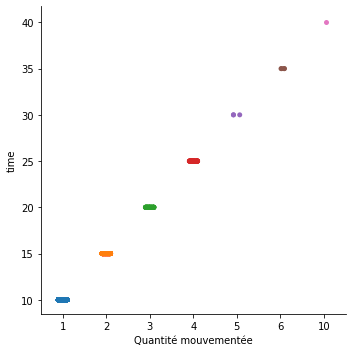

In [ ]:
#Prévisualisation des donées avec seaborn 
import seaborn as sns
sns.catplot(x = "Quantité mouvementée", y ="time", data = New_dataset)

In [ ]:
# Séparation des données en variables explicatives X et target y 
X = New_dataset[["Quantité mouvementée"]]
y = New_dataset[["time"]]
print(X)
print(y)

       Quantité mouvementée
0                         1
1                         1
2                         1
3                         1
4                         1
...                     ...
17344                     1
17345                     1
17346                     1
17347                     1
17348                     1

[17349 rows x 1 columns]
       time
0        10
1        10
2        10
3        10
4        10
...     ...
17344    10
17345    10
17346    10
17347    10
17348    10

[17349 rows x 1 columns]


In [ ]:
# Normalisation des X entre -1 et 1 afin qu'ils suivent une loi normale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [ ]:
print(X)

#dimension du vecteur des X
print(X.shape) 

[[-0.23901536]
 [-0.23901536]
 [-0.23901536]
 ...
 [-0.23901536]
 [-0.23901536]
 [-0.23901536]]
(17349, 1)


In [ ]:
# Division du dataset en train et en test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) #80% de train et 20% de test (le 0.2 --> 20%)

In [ ]:
# Création du modèle de regression linéaire 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.coef_)
regressor.coef_.shape

[[1.59699609]]


(1, 1)

In [ ]:
y = 1.59699609 * X
y # la droite est affine 

array([[-0.3817066],
       [-0.3817066],
       [-0.3817066],
       ...,
       [-0.3817066],
       [-0.3817066],
       [-0.3817066]])

In [ ]:
# Evaluation du modèle 
regressor.score(X_test, y_test)

0.9996679287120305

*On obtient un coefficient de détermination R² = 0.99 : une prédiction quasi certaine !*

In [ ]:
# Vérifcation de l'overfitting 
print(" Score de Train : {}\n Score de Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score de Train : 0.9940313014371027
 Score de Test : 0.9996679287120305


*Il n'y a pas d'overfiting car le test et le train sont identiques*

In [ ]:
X_train

array([[-0.23901536],
       [-0.23901536],
       [-0.23901536],
       ...,
       [-0.23901536],
       [12.05654442],
       [-0.23901536]])

In [ ]:
#Prédiction
regressor.predict(X_train)

array([[10.00592906],
       [10.00592906],
       [10.00592906],
       ...,
       [10.00592906],
       [29.64189   ],
       [10.00592906]])

In [ ]:
Quantity_predict = 10  #Quantité à prédire
Quantity_predict_normalized = sc_X.transform([[Quantity_predict ]])
print("Time: {}".format(regressor.predict(Quantity_predict_normalized)[0]))

Time: [54.18684117]


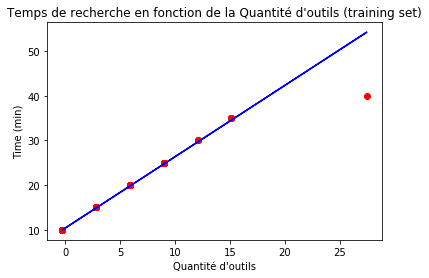

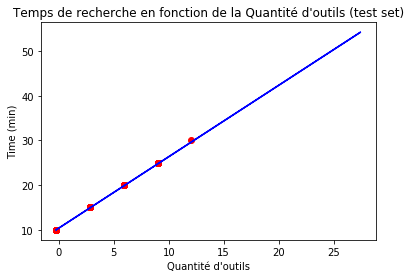

In [ ]:
# Visualisation des Training Set
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Temps de recherche en fonction de la Quantité d'outils (training set)")
plt.xlabel("Quantité d'outils")
plt.ylabel("Time (min)")
plt.show()


# Visualisation des Test Set
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("Temps de recherche en fonction de la Quantité d'outils (test set)")
plt.xlabel("Quantité d'outils")
plt.ylabel("Time (min)")
plt.show()

*2) Régression logistique*

In [ ]:
#Dataset
New_dataset

,Libellé,Type de mouvement,Quantité mouvementée,Date du mouvement,Raison sociale,time
0,LAMPE PORTO A LEDS,Emprunt Client,1,29/11/2019,ORANO DS DEMANTELEMENT ET SERVICES,10
1,CLE DYNAMOMETRIQUE DE 40 A 200 NM,Emprunt Client,1,29/11/2019,ORANO DS DEMANTELEMENT ET SERVICES,10
2,DOUILLE 1/2 COURTE SA 24 BOS 691160,Emprunt Client,1,29/11/2019,ORANO DS DEMANTELEMENT ET SERVICES,10
3,CLE MALE COURTE HEXAGONALE COUDEE DE 6\n,Emprunt Client,1,29/11/2019,KSB SERVICE ENERGIE,10
4,PINCE MULTIPRISE DENTURE TOTALE,Emprunt Client,1,29/11/2019,KSB SERVICE ENERGIE,10
...,...,...,...,...,...,...
17344,ESCABEAU ALU 5 MARCHES,Emprunt Client,1,04/03/2019,BOUYGUES ENERGIES ET SERVICES,10
17345,ESCABEAU ALUMINIUM 3 M,Emprunt Client,1,04/03/2019,BOUYGUES ENERGIES ET SERVICES,10
17346,PERCEUSE AUTONOME,Emprunt Client,1,04/03/2019,BOUYGUES ENERGIES ET SERVICES,10
17347,ETAUX POUR ETABLI ETAUX90001,Emprunt Client,1,04/03/2019,FIVES NORDON,10


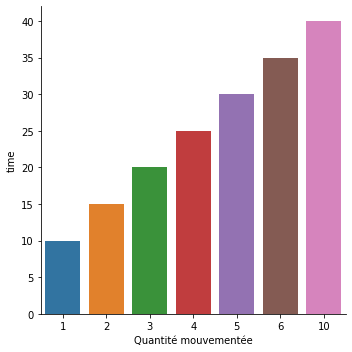

In [ ]:
# Visualisation
print(sns.catplot(x="Quantité mouvementée", y="time", data=New_dataset, kind="bar"))

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


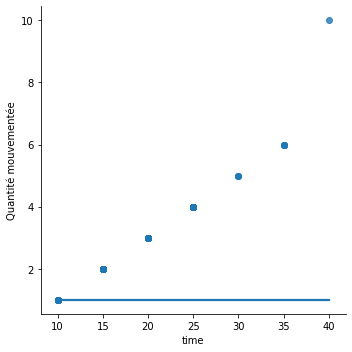

In [ ]:
sns.lmplot(x="time", y="Quantité mouvementée", data=New_dataset, logistic=True)